<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from util import *

In [2]:
dist0 = []
dist1 = []
dist2 = []
dist3 = []
dist4 = []
dist5 = []
for seed in range(10):
    sensors, clients, distances = init_nodes_and_distance_matrix(seed)
    
    tmp = np.zeros_like(distances)
    tmp[distances<=50] = 1
    tmp = np.sum(tmp, axis=0)
    maxxxx = np.sum(tmp>=3)
    
    connection_matrix, num_of_success_clients =  greedy_direct(sensors, clients, distances)
    dist0.append(maxxxx - num_of_success_clients)
    
    connection_matrix, num_of_success_clients =  greedy_most_near(sensors, clients, distances)
    dist1.append(maxxxx - num_of_success_clients)
    maxiter = 100
    SIZE = 20
    connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)
    dist2.append(maxxxx - RankRec[-1])
    maxiter = 100
    SIZE = 40
    connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)
    dist3.append(maxxxx - RankRec[-1])
    
    maxiter = 200
    SIZE = 40
    connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)
    dist4.append(maxxxx - RankRec[-1])
    
    connection_matrix, num_of_success_clients =  max_flow(sensors, clients, distances)
    dist5.append(maxxxx - num_of_success_clients)



In [3]:
import pandas as pd

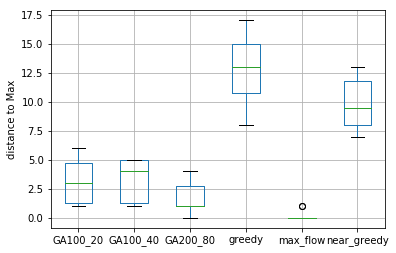

In [4]:
data = pd.DataFrame({'greedy':dist0,
                    'near_greedy':dist1,
                    'GA100_20':dist2,
                    'GA100_40':dist3,
                    'GA200_80':dist4,
                    'max_flow':dist5})
plt.ylabel('distance to Max')
data.boxplot()

In [14]:
%%time
maxiter = 200
SIZE = 80
connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)

# connection_matrix, num_of_success_clients =  max_flow(sensors, clients, distances)

Wall time: 2.09 s


In [15]:
RankRec[-1]

79

In [16]:
%%time
connection_matrix, num_of_success_clients =  max_flow(sensors, clients, distances)

Wall time: 2.38 s


In [17]:
num_of_success_clients

81